In [2]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../")
import os

#!pip install matplotlib --upgrade
import seaborn as sns

sns.set(font_scale=2)

import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from vectorize_corona import VectorizeCorona

In [45]:
DATA_PATH = "/scratch/work/luongn1/digirhythm/data/processed/corona/"
VIZ_PATH = "/scratch/work/luongn1/digirhythm/viz/"
df = pd.read_csv(DATA_PATH + "vector_corona_4epochs.csv", index_col=0)

# Filter subject with at least 28 days of data
df = df.groupby("subject_id").filter(lambda x: len(x) >= 28)
df

,subject_id,date,heart_rate_avg,beat_to_beat_avg,heart_rate_variability_avg,breathing_rate_avg,nightly_recharge_status,ans_charge,ans_charge_status,heart_rate_variability_avg:norm,...,stepsx1000:evening:norm,stepsx1000:total:norm,steps:total:norm,tst,midsleep,bedtime,waketime,total_interruption_duration,tst:norm,midsleep:norm
0,2123461352,2021-06-22,56,1056,39.0,15.2,1.0,-2.6,NaN,0.132653,...,0.543365,0.125396,0.125396,6.50,27.23,23.98,30.66,660,0.344045,0.533632
1,3671581472,2021-06-23,63,949,43.0,13.8,5.0,1.6,NaN,0.500000,...,0.820651,0.355529,0.355529,6.86,28.01,24.58,32.34,3240,0.624031,0.308357
2,3609986162,2021-06-23,52,1145,98.0,10.8,5.0,8.0,NaN,0.572650,...,0.248182,0.505332,0.505332,6.76,25.72,22.34,29.58,1710,0.502868,0.496760
3,2123461352,2021-06-23,55,1079,61.0,15.6,5.0,1.1,NaN,0.357143,...,0.138462,0.077122,0.077122,7.93,26.50,22.54,30.64,630,0.614367,0.206278
4,3671581472,2021-06-24,60,994,43.0,13.2,5.0,6.3,NaN,0.500000,...,0.162292,0.524269,0.524269,6.07,28.58,25.55,32.42,2880,0.470930,0.390490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28569,943412086,2022-07-04,75,800,41.0,13.2,3.0,-3.7,2.0,0.428571,...,0.324532,0.713109,0.713109,8.46,27.68,23.45,32.60,2490,0.572581,0.746622
28570,91109228,2022-07-04,57,1046,57.0,14.6,1.0,-7.0,1.0,0.545455,...,0.407662,0.207454,0.207454,6.39,28.28,25.09,32.25,2760,0.414673,0.335832
28571,2038129448,2022-07-04,52,1150,76.0,12.9,6.0,10.0,5.0,0.728814,...,0.569853,0.307895,0.307895,8.29,29.76,25.61,34.42,1860,0.596330,0.523026
28572,894567464,2022-07-03,58,1034,52.0,14.3,2.0,-6.5,1.0,0.205882,...,0.186779,0.522049,0.522049,7.34,28.39,24.72,32.63,2040,0.646077,0.675532


## Distribution

In [46]:
avg_df = df.groupby("subject_id").mean(numeric_only=True)
avg_df["midsleep"] = avg_df["midsleep"] - 24
avg_df

,heart_rate_avg,beat_to_beat_avg,heart_rate_variability_avg,breathing_rate_avg,nightly_recharge_status,ans_charge,ans_charge_status,heart_rate_variability_avg:norm,steps:night,steps:morning,...,stepsx1000:evening:norm,stepsx1000:total:norm,steps:total:norm,tst,midsleep,bedtime,waketime,total_interruption_duration,tst:norm,midsleep:norm
subject_id,,,,,,,,,,,,,,,,,,,,,
38758730,49.586751,1205.823344,49.167722,13.401577,3.673016,-0.566032,2.961240,0.388903,340.665615,2017.252366,...,0.334892,0.205296,0.205296,7.172271,3.728644,24.142461,31.866120,1984.258675,0.512131,0.447108
91109228,56.428044,1060.295203,58.878229,14.952768,3.627306,-0.480812,3.023077,0.573913,171.900369,1466.413284,...,0.405844,0.245384,0.245384,7.477454,4.236125,24.497343,32.584428,2194.317343,0.588111,0.329254
109662472,64.297980,931.308081,48.282828,13.756566,3.658163,-0.450000,2.845070,0.259547,290.353535,3185.757576,...,0.192831,0.239320,0.239320,7.753485,3.940556,24.063434,32.483586,2399.242424,0.506753,0.376329
163655554,53.255952,1118.476190,56.732143,13.915476,3.928144,0.443713,NaN,0.494643,13.238095,1022.839286,...,0.400412,0.199489,0.199489,7.466071,3.096012,23.362976,31.600952,2778.571429,0.791719,0.509681
172767574,57.523810,1043.002801,55.123249,12.738936,3.656338,-0.031268,2.981928,0.543004,51.683473,3669.002801,...,0.185861,0.307655,0.307655,6.022997,2.831737,23.820252,30.667787,2967.983193,0.418088,0.414176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189000906,51.252381,1168.357143,122.909524,12.749524,3.456731,-0.337981,2.859649,0.590912,717.961905,3004.128571,...,0.303592,0.214079,0.214079,6.616286,4.375905,25.067333,32.351333,2403.428571,0.391607,0.403716
4194777838,53.732877,1112.695205,57.095890,12.880822,3.759450,-0.367354,2.918367,0.453368,60.537671,3204.020548,...,0.185449,0.252006,0.252006,7.810651,3.196507,23.291233,31.482705,1370.239726,0.442441,0.482341
4230719780,57.179211,1051.358423,88.474820,15.058781,3.610108,-0.253430,3.034483,0.564836,235.347670,1547.681004,...,0.355367,0.310361,0.310361,6.327240,4.212832,25.049534,31.704875,1180.645161,0.366339,0.454563


/share/apps/anaconda-ci/fgci-centos7-generic/software/anaconda/2020-03-tf1/f43b17a3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


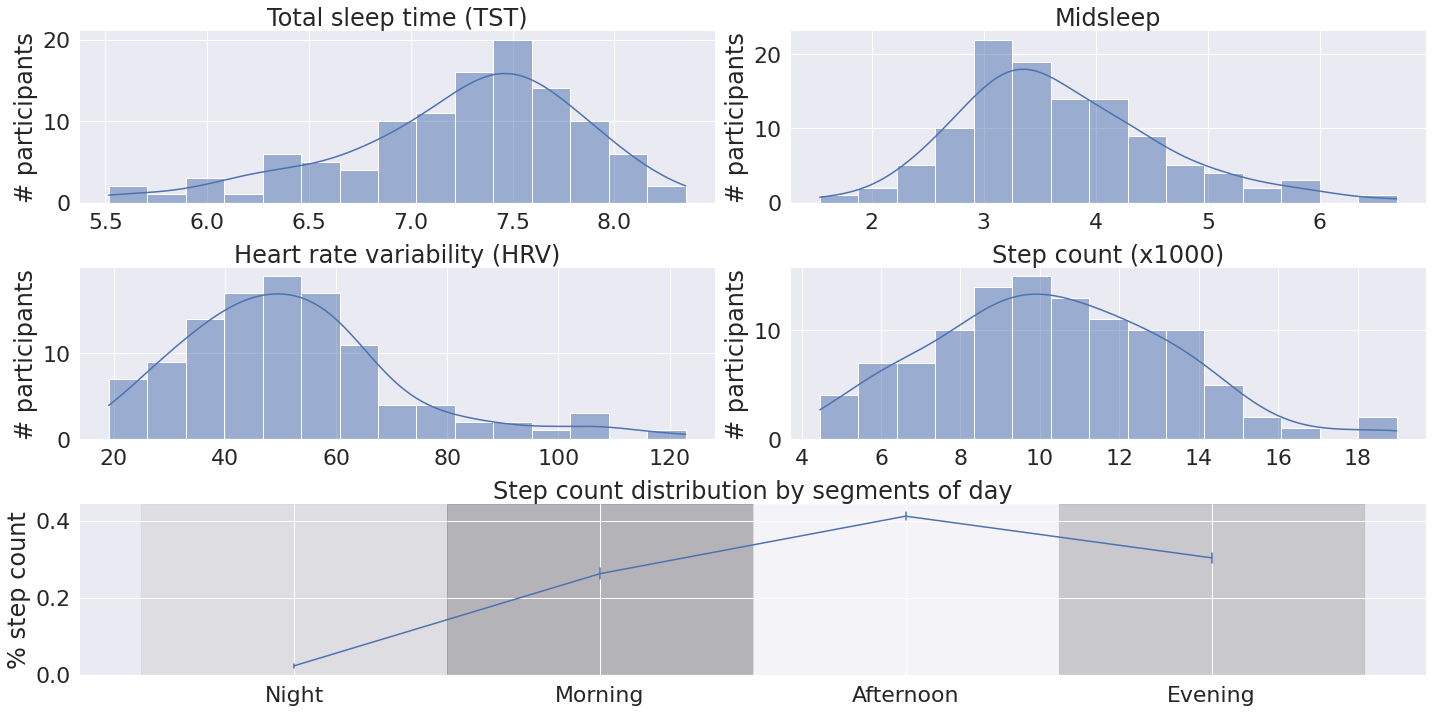

In [56]:
# Set up the matplotlib figure
f, axes = fig, axes = plt.subplot_mosaic("AB;CD;EE", figsize=(20, 10))
f.tight_layout()

sns.despine(left=True)

# Plot a histogram and kernel density estimate for TST
sns.histplot(avg_df["tst"], kde=True, ax=axes["A"], bins=15)
axes["A"].set_title("Total sleep time (TST)")
axes["A"].set_xlabel("")
axes["A"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for Midsleep
sns.histplot(avg_df["midsleep"], kde=True, ax=axes["B"], bins=15)
axes["B"].set_title("Midsleep")
axes["B"].set_xlabel("")
axes["B"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for HRV
sns.histplot(avg_df["heart_rate_variability_avg"], kde=True, ax=axes["C"], bins=15)
axes["C"].set_title("Heart rate variability (HRV)")
axes["C"].set_xlabel("")
axes["C"].set_ylabel("# participants")

# Plot a histogram and kernel density estimate for Step Count
sns.histplot(avg_df["stepsx1000:total"], kde=True, ax=axes["D"], bins=15)
axes["D"].set_title("Step count (x1000)")
axes["D"].set_xlabel("")
axes["D"].set_ylabel("# participants")

# Create a bar plot that spans two columns for step counts during different times of the day
# step_counts = avg_df.groupby('subject_id'[['steps:night:norm', 'steps:morning:norm', 'steps:afternoon:norm', 'steps:evening:norm']].mean().reset_index()
step_counts = pd.melt(
    avg_df.reset_index(),
    id_vars=["subject_id"],
    value_vars=[
        "steps:night:norm",
        "steps:morning:norm",
        "steps:afternoon:norm",
        "steps:evening:norm",
    ],
)
sns.lineplot(
    x="variable",
    y="value",
    data=step_counts,
    ax=axes["E"],
    err_style="bars",
    errorbar=("se", 2),
)
axes["E"].set_title("Step count distribution by segments of day")
axes["E"].set_xlabel("")

# Rename the y-ticks to show specific times of day
axes["E"].set_xticklabels(["Night", "Morning", "Afternoon", "Evening"])
axes["E"].set_ylabel("% step count")


# Add shaded regions
axes["E"].axvspan(-0.5, 0.5, color="lightgray", alpha=0.5, zorder=0)
axes["E"].axvspan(0.5, 1.5, color="gray", alpha=0.5, zorder=0)
axes["E"].axvspan(1.5, 2.5, color="white", alpha=0.5, zorder=0)
axes["E"].axvspan(2.5, 3.5, color="darkgray", alpha=0.5, zorder=0)


f.subplots_adjust(hspace=0.4)

plt.savefig(VIZ_PATH + "01_corona_description.png", bbox_inches="tight", dpi=300)
plt.tight_layout()
plt.show()

In [42]:
step_counts

,subject_id,variable,value
0,38758730,steps:night:norm,0.032281
1,91109228,steps:night:norm,0.021770
2,109662472,steps:night:norm,0.034322
3,163655554,steps:night:norm,0.001996
4,172767574,steps:night:norm,0.006055
...,...,...,...
439,4189000906,steps:evening:norm,0.303592
440,4194777838,steps:evening:norm,0.185449
441,4230719780,steps:evening:norm,0.355367
442,4240001906,steps:evening:norm,0.310817
